# How has COVID-19 influenced medical interviews? 
# LSDP Project Group 2

[Section 3. RQ1 - Symptom recognition](#3) is done by Dilara Tank

[Section 4. RQ2 - Sentiment Analysis](#4) is done by Shelby Jhorai

[Section 5. RQ3 - Question Classification](#5) is done by Rutger Ettes

# Table of Contents
* [1. Introduction](#1)
* [2. Data description](#2)
    * [2.1. MedDialog dataset (English)](#2.1)
    * [2.2. COVID-Dialogue-Dataset-English](#2.2)
    * [2.3. Download](#2.3)
* [3. RQ1 - Symptom Recognition](#3)
    * [3.1. Related Literature](#3.1)
    * [3.2. Experimental Setup](#3.2)
        * [3.2.1. Dataset Preprocessing](#3.2.1)
        * [3.2.2. Approach](#3.2.2)
        * [3.2.3. Implementation Details](#3.2.3)
    * [3.3 Model Finetuning](#3.3)    
    * [3.4. Evaluation](#3.4)
        * [3.4.1. Metrics](#3.4.1)
        * [3.4.2. Results](#3.4.2)
        * [3.4.3. Error Analysis](#3.4.3)
    * [3.5. Findings](#3.5)
        * [3.5.1. Illustration](#3.5.1)
        * [3.5.2. Interpretation](#3.5.2)
        * [3.5.3. Discussion](#3.5.3)
    * [3.6. Conclusion](#3.6)
        * [3.6.1. Summary](#3.6.1)
        * [3.6.2. Lessons Learned](#3.6.2)
        * [3.6.3. Directions for future work](#3.6.3)
* [4. RQ2 - Sentiment Analysis](#4)
    * [4.1. Related Literature](#4.1)
    * [4.2. Experimental Setup](#4.2)
        * [4.2.1. Additional Data](#4.2.1)
        * [4.2.2. Preliminaries](#4.2.2)
        * [4.2.3. Preprocessing](#4.2.3)
        * [4.2.4. Multi-Label Classification Model](#4.2.4)
    * [4.3. Evaluation](#4.3)
        * [4.3.1. Metrics](#4.3.1)
        * [4.3.2. Results](#4.3.2)
        * [4.4.3. Error Analysis](#4.4.3)
    * [4.4. Findings](#4.4)
    * [4.5. Conclusion](#4.5)
* [5. RQ1 - Question Classification](#5)
    * [5.1. Related Literature](#5.1)
    * [5.2. Experimental Setup](#5.2)
        * [5.2.1. Additional Data](#5.2.1)
        * [5.2.2. Approach](#5.2.2)
        * [5.2.3. Implementation](#5.2.3)
    * [5.3. Evaluation](#5.3)
        * [5.3.1. Metrics](#5.3.1)
        * [5.3.2. Results](#5.3.2)
        * [5.3.3. Error Analysis](#5.5.5)
    * [5.4. Findings](#5.4)
        * [5.4.1. Illustration](#5.4.1)
        * [5.4.2. Interpretation](#5.4.2)
        * [5.4.3. Discussion](#5.4.3)
    * [5.5. Conclusion](#5.5)
        * [5.5.1. Summary](#5.5.1)
        * [5.5.2. Lessons Learned](#5.5.2)
        * [5.5.3. Directions for future work](#5.5.3)
* [6. Conclusions](#6)
* [7. References](#7)

# 1. Introduction <a class="anchor" id="1"></a>
The COVID-19 pandemic is a challenging time for all of us. The rapid spread and the deadliness of the virus have led to great social and economic disruption: lockdown in multiple countries, a global recession, and the closing of public areas. Healthcare workers run overtime to manage the shortage of hospital beds and treatment of the COVID-19 virus, while not much is known about it. AI models, specialized in NLP tasks, could help process COVID-19 information in medical interviews and make it more interpretable and visible. This could be of help in getting to know the virus and advising patients what to do. This project will focus on the influence of COVID-19 in medical interviews. Three different topics, research questions, and models will be discussed to answer the question: __How has COVID-19 influenced medical interviews?__

There is plentiful information in medical interviews. The interviews mention symptoms, possible diseases, and ways to deal with certain symptoms. The symptoms mentioned in an interview could be important to quickly visualize and grasp what the dialogue is about. This could especially be of importance in COVID-19 dialogue to summarize the most common symptoms of this virus. Comparing the most common symptoms in medical dialogue before and after COVID-19 could give an insight into the changes that the virus has made in these medical interviews. Therefore, the first research question is: What are the most common symptoms before and after COVID-19 in medical interviews?
Patients are usually afraid, sad, or worried when they have a doctor's appointment. During medical interviews, the patients discuss their concerns and symptoms with the doctor. These interviews generally have negative sentiment because if everything were all right, the patient would not be there. It would be interesting to research if the COVID-19 pandemic made the overall emotion of these interviews more negative. It might be that doctors who get asked the same questions over and over again, while the information might be publicly available, get more irritated. It could also be that patients are more afraid because of the uncertainty that this pandemic brings with it. These assumptions lead to the second research question: __How has COVID-19 influenced the emotions of medical interviews?__

When consulting a physician, online or otherwise, people usually have a rather specific question to ask. These questions could be about specific symptoms one is suffering from, about medication one is taking, or advice on more general health-related issues such as diet and exercise. Therefore, aside from the specific symptoms mentioned and the emotions conveyed within the dialogue, one might also want to know more broadly what sort of questions are asked. Knowledge about the types of questions asked could be used in various ways: this knowledge might be a first step towards automatically answering such a question; it could be used to send a patient's question to a relevant expert automatically, and it could be useful to decide which questions should be answered first. With this in mind, it would be interesting to explore how COVID-19 has affected the relative amounts of types of questions asked. Therefore our third research question is: __How has COVID-19 influenced the types of questions asked by patients in medical interviews?__

The report starts with a description of two medical interview datasets ([Section 2](#2)) that are used to research the influence of COVID-19. In [Section 3](#3), a symptom recognition model is applied to the medical interview data. This section will discuss the first research question, the experimental setup and method, and its results. In [Section 4](#4), a multi-label classification model is built to perform Sentiment Analysis. In [Section 5](#5), a text classification model is applied to patients’ questions. Finally, we conclude our research and discuss possible improvements ([Section 6](#6)).


# 2. Data Description <a class="anchor" id="2"></a>
 
For this report, we use two datasets. The MedDialog dataset contains medical interviews that were recorded before the Corona pandemic. The COVID-Dialogue dataset contains medical interviews about COVID-19 symptoms after it started to spread. Both datasets are described below.

## 2.1. MedDialog Dataset (English) <a class="anchor" id="2.1"></a>
The [MedDialog dataset (English)](https://github.com/UCSD-AI4H/Medical-Dialogue-System) is a dataset containing medical interviews concerning pregnancy, abutment of the nerve root, pounding in the heart and more. Each entry contains an ID, description and the dialogue between doctor and patient. This dataset consists of 4 datasets, the 'icliniq' dataset will be used for this project because of the wide variety of medical subjects. The dataset is collected by crawling data from the online medical  platforms iclinic.com and healthcaremagic.com, where patients and doctors communicate on an online forum. It was chosen because this dataset was one of the few medical dialogue datasets that was available in English, while also being large enough and academically collected. An example of an interview in the dataset:

```
id=21124
https://www.icliniq.com/qa/tonsillitis/why-is-there-pain-in-throat-while-eating-or-drinking

Description
Q. Why is there pain in throat while eating or drinking?

Dialogue
Patient:
Hello doctor,
It pains a lot in my throat on right side whenever I eat or drink something. This happened after I recovered from a cough and fever. Please help.
Doctor:
Hello. It can be posterior pharyngitis or especially tonsillitis like infection. Your posterior pharynx examination has to be done. If congestion is more, then it is better to investigate with CBC (complete blood count), ASO (anti-streptolysin O titer) like further investigation. Your doctor might put you on antibiotic and decongestant course for five days. Drink lots of water. Avoid excess spicy foods. Vitamin C lozenges can be chewed frequently. Salt water gargle can be done with warm water three times a day. You can consult an otorhinolaryngologist for examination. 
```

## 2.2. COVID-Dialogue-Dataset-English <a class="anchor" id="2.2"></a>
The [COVID-Dialogue-Dataset-English](https://github.com/UCSD-AI4H/COVID-Dialogue) is a dataset containing 603 English medical interviews about COVID-19 related concerns. Each interview in the dataset consists of an ID, URL, description of the patient's medical condition and the dialogue between the patient and doctor. The dataset is collected by crawling data from the online medical platforms icliniq.com, healthcaremagic.com, healthtap.com,  where patients and doctors communicate on an online forum. It was chosen because it was the only medical dialogue dataset about COVID-19 that was available. An example of an interview in the dataset:

```
id=216
https://www.healthtap.com/member/fg?page=/search/covid

Description
I'm quite sure that I have Covid-19. My mother is a health worker that has been exposed. Among my symptoms is trouble breathing and pain in the chest. Can I sleep and see how I feel tomorrow or is there a risk that I'll stop breathing in the night?

Dialogue
Patient:
I'm quite sure that I have Covid-19. My mother is a health worker that has been exposed. Among my symptoms is trouble breathing and pain in the chest. Can I sleep and see how I feel tomorrow or is there a risk that I'll stop breathing in the night?
Doctor:
Seek help. Contact to your doctor or go to ER for trouble to breath. If you go to ER they test you for covid 19. Your mother also can be  tested if symptomtic.
```

## 2.3. Download <a class="anchor" id="2.3"></a>
To be able to run the code of this project locally, take the following steps:
1. Download the `COVID-Dialogue-Dataset-English.txt` file from COVID-Dialogue-Dataset [here](https://github.com/UCSD-AI4H/COVID-Dialogue). You can download the file by clicking on the filename on the github page and then right clicking on the `raw` button and selecting `save link as` in the menu. 
2. Download the `icliniq_dialogue.txt` file from the MedDialog dataset (English) [here](https://github.com/UCSD-AI4H/Medical-Dialogue-System). You can download the file from the mentioned Google Drive link. 
3. Create a `data` folder, and put the files in this folder. 

If everything went well, the following script, when uncommented, should give this output:

```Python
LSDP2021-Group2/data
COVID-Dialogue-Dataset-English.txt  icliniq_dialogue.txt
```

The output might look slightly different depending on your operating system. You should still be able to see that the files are in the folder.

In [17]:
# %cd data
# %ls
# %cd ../

# 3. RQ1 - Symptom Recognition <a class="anchor" id="3"></a>

The research question of this section is: What are the most common symptoms before and after COVID-19 in medical interviews?

The code is designed to work as follows:

- Feed it a medical dialogue, where symptoms are discussed
- The code will extract the symptoms
- The code will display the most common symptoms in that conversation

An example can be illustrated with the following conversation: <br>
Patient: Hello doctor, these last few days I have been __coughing__ a lot.<br>
Doctor: That is unfortunate to hear, do you have any other symptoms like __sore throat__, __chest pains__, etc?<br>
Patient: I have a __cough__ and in addition to that also a __sore throat__, but that's about it.<br>
Doctor: Alright, a __cough__ and a __sore throat__ are symptoms of the Coronavirus but because of the time of year I assume you just have a __cold__. It is advised to take a test and take medicine for your __cough__ and __sore throat__.

The model would then output 'cough' and 'sore throat' as the most common symptoms discussed in this dialogue.

For this section, the code that is not in the report will be imported from the file `RQ1_utils.py`. This is done for a better overview of the report structure.

Further requirements will be imported from the folder `RQ1`. This folder consists of annotated data for model evaluation, finetune data for model finetuning, a finetuned model to use for predictions and pre-saved results.


## 3.1. Related Literature <a class="anchor" id="3.1"></a>

__Transformers__: A transformer model is used in Natural Language Processing (NLP) for sequence-to-sequence tasks such as language translation (Vaswani et al., 2017). Transformer models apply an attention mechanism, where the model determines which parts of an input sequence are important. This results in understanding relationships between all words in a sentence, without having to worry about their respective position. Transformers consist of an encoder that maps the input sequence into a higher dimensional space and a decoder that produces an output sequence, for example, a translation of the input sequence. The encoder of the Transformers model reads the whole input sentence at once, making parallel training and processing possible. This gives it an advantage over other NLP models.

__BERT__: BERT (Bidirectional Encoder Representations from Transformers) is a language representation model that applies a bidirectional training of Transformers to language modeling (Devlin et al., 2018). Instead of reading the input sentence from left to right or right to left, both sides are considered, making it bidirectional. Because of the bidirectionality, the model learns the context of a word based on its surroundings instead of just the previous words. This allows for a deeper understanding of words and sentences. Using the fact that BERT can capture a deeper understanding of words and sentences, it can be applied to multiple NLP tasks by fine-tuning the model by adding a new layer on top of the model. The architecture of the new layer depends on the tasks one wants to do.

__RoBERTa__: RoBERTa is an extension of the BERT model. It is trained longer and on more data, providing a stronger core model (Liu et al., 2019). For NLP tasks, adding an additional layer on top is still possible.

__NER__: NER (Named Entity Recognition) tries to classify named entities mentioned in the text into certain categories such as a person, location, disease, or symptom. It is explained before that a new layer is needed for the BERT or roBERTa model to perform NLP tasks. In the case of NER, this additional layer is a randomly initialized classifier (Vamvas, 2019). After training, this classifier outputs the most likely category of the words in the input sequence. [T-NER](https://github.com/asahi417/tner) (Transformers-based Named Entity Recognition) is a python package for language model finetuning on NER (Ushio & Camacho-Collados, 2021). It provides RoBERTa models that are pre-trained to perform NER on various datasets.

Not much literature could be found about symptom recognition from the text specifically. However, the model - used in this research, a pre-trained T-NER RoBERTa bc5cdr model, is trained on medical data and can be used for symptom recognition, by using the technique of NER. It is trained on the bc5cdr dataset (Wei et al., 2015), which consists of 1500 PubMed articles that are annotated for biomedical usage (chemicals, diseases, etc.). In this annotated dataset, 'disease' corresponds to 'symptom'. Because the model is a BERT-based model that applies bi-directional training to a Transformers architecture, it captures a deeper understanding of words and sentences by looking at the context of the word. This is essential for NER tasks because a deeper understanding of a word can say a lot about the entity of that word. The combination of the bi-directionality and the attention mechanism ensures that the model groups words of a certain entity together.


It is not recommended to run the installations in your terminal, because inconsistencies could (and probably will) arise. Therefore, please create a new Conda environment (to prevent inconsistencies) and run: 

```Python
pip install pip -U 
pip install sentencepiece 
pip install sortedcontainers==2.1.0 
pip install tner
```
    
Additionally, you will need to have the Pandas and NLTK library installed:

```Python
pip install pandas
pip install nltk
```


In [2]:
# Imports
import RQ1_utils as RQ1
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
from tqdm import tqdm 
from collections import Counter
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer 

from tner import TransformersNER
from pprint import pprint

[nltk_data] Downloading package punkt to /home/dilaratank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


If the T-NER import doesn't work try to do the following:
- Please open jupyter notebook in your terminal from the place where you did the installations. So if you installed the packages at '/home/user/Desktop', please navigate there in your terminal and open the notebook from there (this worked for me).
- If that doesn't work please run the code for RQ1 separately in this google colab notebook:

<a href="https://colab.research.google.com/github/dilaratank/roBERTa-Symptom-Tracking/blob/main/Symptom_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3.2.1. Dataset Preprocessing <a class="anchor" id="3.2.1"></a>

The RoBERTa model requires the data to be structured per sentence, which is done in the preprocessing steps. For the model, it is necessary to get a sentence as input. The initial BERT-architecture, on which RoBERTa is based, uses an attention mechanism and bi-directionality to quickly capture the most important parts in the input sentence. Because this particular RoBERTa model is trained on medical entities,  it will recognize medical entities as most important. To apply the attention mechanism and bi-directionality, the entire sentence is needed as context.

First, the data is split on dialogue to get rid of other unnecessary information. Afterwards, the data is split into sentences and saved as a .csv file for later use.

Preprocessing the data might take a while! Especially the icliniq dialogue.


In [3]:
if not os.path.exists('RQ1/saved/COVID-Dialogue-Dataset-English.csv'):
    RQ1.preprocess_to_csv('data/COVID-Dialogue-Dataset-English.txt', 'RQ1/saved/')
if not os.path.exists('RQ1/saved/icliniq_dialogue.csv'):
    RQ1.preprocess_to_csv('data/icliniq_dialogue.txt', 'RQ1/saved/')

COVID-Dialogue-Dataset-English.txt done
icliniq_dialogue.txt done


The data now looks like this:

In [4]:
covid_dialogue_df = pd.read_csv('RQ1/saved/COVID-Dialogue-Dataset-English.csv')
icliniq_dialogue_df = pd.read_csv('RQ1/saved/icliniq_dialogue.csv')
covid_dialogue_df.head()

,sentences
0,"Hello doctor, I get a cough for the last few d..."
1,No raise in temperature but feeling tired with...
2,No contact with any Covid-19 persons.
3,It has been four to five days and has drunk a ...
4,Doctors have shut the OP so do not know what t...


__Downsampling__ <br>
Because the Icliniq dialogue data is 60 times larger than the COVID-19 dialogue data, there is an imbalance in the data. Therefore, the Icliniq data will be shortened to +/ 5500 sentences. For this purpose, a saved .csv file will be used so that the results will not change (due to randomness). To run this code please remove '`if not os.path.exists(...)` etc'. If you run this code, do note that the dataframe will be different each time.

In [5]:
if not os.path.exists('RQ1/saved/icliniq_dialogue_short.csv'):
    np.random.seed(10)
    dfcopy = icliniq_dialogue_df.copy()
    remove_n = 263500
    drop_indices = np.random.choice(dfcopy.index, remove_n, replace=False)
    icliniq_dialogue_short_df = dfcopy.drop(drop_indices)
    icliniq_dialogue_short_df.to_csv('RQ1/saved/icliniq_dialogue_short.csv')
icliniq_dialogue_short_df = pd.read_csv('RQ1/saved/icliniq_dialogue_short.csv')

### 3.2.2. Approach <a class="anchor" id="3.2.2"></a>

The approach of this research is as follows.
 
First, a pre-trained RoBERTa is used to extract symptoms from the medical dialogue. For this purpose, a function was written that takes the output of the RoBERTa model and returns only the predicted symptoms. After the data is pre-processed, it is passed to a function that collects the predicted symptoms per dialogue sentence. These symptoms are then put into a dataframe. This is done because it makes it easier to use built-in functions such as `Counter()`.
 
This model is evaluated by using the accuracy metric. This metric is chosen because the model makes a binary classification: good prediction or bad prediction. For evaluation, a part of the data is annotated by hand and is used as ground truth.
 
The second step is model fine-tuning. The model is fine-tuned on a dataset that is annotated again by hand to achieve a higher accuracy score. The fine-tuning dataset includes a train and test part, and consists of roughly 200 annotated sentences.
 
Next, this model is also evaluated with the accuracy metric, using the same annotated data as before. This is so that the accuracy scores can be compared.
 
Finally, a counter is used to count all the symptoms that the model has extracted. This counter is then used to display the most common symptoms in the dialogue: the more the word occurs in the dialogue, the more common it is. For the sake of clarity and easier understanding, the 5 most common symptoms (the 5 first symptoms in the counter) are displayed using a bar plot. The use of a top 5 was chosen, because it allows one to easily grasp the most common symptoms, while not mentioning all the symptoms used in the dialogue.
 
These steps are applied to both datasets, so that the top 5 symptoms of both datasets can be compared with each other.


### 3.2.3. Implementation Details  <a class="anchor" id="3.2.3"></a>

First, download the pretrained model from HuggingFace. If this doesn't work, please open this code in a google colab. 

In [6]:
model = TransformersNER('asahi417/tner-xlm-roberta-base-bc5cdr')

2021-03-25 08:07:17 INFO     *** initialize network ***
/home/dilaratank/anaconda3/envs/tner-env/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


To determine the most used symptoms in a healthcare dialogue, the function `get_symptoms_data()` has been designed. It consists of 5 steps that will be discussed. The steps are also commented in the function for easier understanding and following.

While looping over the separate sentences in the dataframe: <br>
__Step 1__: First, the prediction of the sentence is extracted using the function `model.predict()` that is part of the T-NER package. <br>
__Step 2__: Second, only the predicted symptoms are extracted using the custom function `get_predicted_symptoms(prediction)`. This function returns the symptoms mentioned in the sentence by only selecting the predicted entities that are labeled 'disease'. <br>
__Step 3__: Then, all these symptoms are gathered, lemmatized and put in a different dataframe. Note that this layout is not structured by sentence. All the symptoms are placed separately in the dataframe. <br>
__Step 4__: After that, a counter is applied to this dataframe.  This allows the top 5 used symptoms to be extracted. <br>
__Step 5__: The top 5 used symptoms are extracted and plotted for easy observation.



In [7]:
lemmatizer = WordNetLemmatizer()

def get_predicted_symptoms(prediction):
    """
    This function takes in the prediction of a sentence of the pre-trained model 
    and returns the symptoms mentioned in that sentence.
    """
    
    symptoms = []
    
    # Check if there is a predicted entity
    if len(prediction[0]['entity']) > 0:
        number_of_entities = len(prediction[0]['entity'])
    
        # Loop over predicted entities and get symptoms (here called: disease)
        for i in range(number_of_entities):
            if prediction[0]['entity'][i]['type'] == 'disease':
                symptoms.append(prediction[0]['entity'][i]['mention'])
            
    return symptoms 

def get_symptoms_data(df, model):
    """
    This function takes a (preprocessed) dataframe as input, determines the predicted
    symptoms per phrase, and outputs a dictionary with the 5 most frequent symptoms used,
    while also plotting the counts of the words in a barplot. 
    
    The steps (1-5) are explained in the report. 
    """
    
    all_symptoms = []
    skipped_sentences = 0
    
    for ind in tqdm(df.index):
        sentence = df['sentences'][ind]
        
        # Padding is needed because algorithms is not used to small sentences
        if len(sentence) < 45:
            sentence = sentence+'...'
        
        # Step 1
        try:
            prediction = model.predict([sentence])
        except:
            skipped_sentences += 1
            continue
        
        # Step 2
        predicted_symptom = get_predicted_symptoms(prediction)
        predicted_symptom = [x.lower() for x in predicted_symptom]
        predicted_symptom = [x.split(', ')[0] for x in predicted_symptom]
        
        # Step 3
        for symptom in predicted_symptom:
            if symptom != 'coronavirus': # Remove 'coronavirus', because it is not a symptom
                symptom = lemmatizer.lemmatize(symptom)# Lemmatize the symptoms
                all_symptoms.append(symptom)
            
    df_symptoms = DataFrame(all_symptoms,columns=['symptoms'])
    
    # Step 4
    count_symptoms = Counter()
    
    # Split on 'enter(\n)' so that grouped words stay 1 symptom
    df_symptoms['symptoms'].str.lower().str.split('\n').apply(count_symptoms.update) 

    # Most common symptoms: Step 5
    print('Skipped sentences: ', skipped_sentences)
    top5 = dict(count_symptoms.most_common(5))
    print(top5)
    plt.bar(range(len(top5)), list(top5.values()), align='center')
    plt.xticks(range(len(top5)), list(top5.keys()))
    plt.title('Most common symptoms')
    plt.show()

### 3.2.4. Annotation Details  <a class="anchor" id="3.2.4"></a>

The annotated data for this research question is stored in the folders `RQ1/annotated_data` and `RQ1/finetune_data`. In this section, some details regarding the annotation will be explained. 

First of all, the data is annotated by one person. Disease symptoms are quite objective and because our group does not have a lot of medical knowledge, it was decided that multiple annotators would be unnecessary. Probably multiple annotations would just be confusing. 

Secondly, tThe annotated data is used for training and evaluation. They both follow a different annotation scheme, which is discussed in the following sections where the annotated data is mentioned. The annotated data is used for training and evaluation. 

## 3.3. Model Fine-tuning <a class="anchor" id="3.3"></a>

The pre-trained RoBERTa model will be fine-tuned on data that was annotated by hand. Both from the COVID-Dialogue and MedDialogue dataset, 100 sentences were annotated by hand and split into a train and test set.

The annotation followed a BIO-scheme. Meaning the following: an entity is marked with B when it is the start of a symptom. When the symptom consists of more than one word, the following words are marked with I. The other words are marked with O.

The annotated data looks like this

In [8]:
!head -n 10 RQ1/finetune_data/train.txt

Hello O
doctor O
, O
I O
get O
a O
cough B-disease
for O
the O
last O


The model was finetuned with the following parameters. 

```Python
from tner import TrainTransformersNER
trainer = TrainTransformersNER(
        checkpoint_dir='./ckpt_additional_training',
        dataset='/content/roBERTa-Symptom-Tracking/finetune_data',
        transformers_model='asahi417/tner-xlm-roberta-base-bc5cdr',
        random_seed=1234,
        lr=1e-5,
        total_step=100,
        warmup_step=10,
        batch_size=8,
        max_seq_length=128)
```

The model that was fine-tuned is the RoBERTa bc5cdr model. A small batch size of 8 is used because there was not much training data available (because it is annotated by hand). The total number of steps taken in the finetuning process is 100, because after 100 steps a loss of +/- 0 was already reached. This can be seen in the following tensorboard.

In [9]:
%load_ext tensorboard

In [10]:
tensorboard --logdir='RQ1/finetuned_model'

To reproduce the code, please run the code in the following colab notebook:

<a href="https://colab.research.google.com/github/dilaratank/roBERTa-Symptom-Tracking/blob/main/Symptom_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the next step, the model is initialized. 

In [11]:
finetuned_model = TransformersNER('RQ1/finetuned_model')

2021-03-25 08:07:53 INFO     *** initialize network ***


## 3.4. Evaluation <a class="anchor" id="3.4"></a>

### 3.4.1. Metrics <a class="anchor" id="3.4.1"></a>
The models will be evaluated using the accuracy metric. The T-NER package also included evaluation functions, but the accuracy function used for this research has been designed from scratch. The reason for this is because the T-NER functions needed the data to be in a different format. It has been decided that pre-processing the code again, only for that purpose, was not optimal. The accuracy function that has been developed keeps track of the total number of symptoms and the number of correctly predicted symptoms. The number of correctly predicted symptoms is then divided by the total number of symptoms, which gives the accuracy score.

In [12]:
covid_dialogue_ann_df = pd.read_csv('RQ1/annotated_data/COVID-Dialogue-Dataset-English-annotated.csv')
icliniq_dialogue_ann_df = pd.read_csv('RQ1/annotated_data/icliniq_dialogue_nodup_annotated.csv')

The evaluation data is annotated by hand. Per sentence, the symptoms in that sentence are added to another column in the same row of the dataframe. It looks like this:

In [13]:
covid_dialogue_ann_df.head()

,sentences,symptoms
0,"Hello doctor, I get a cough for the last few d...",cough
1,No raise in temperature but feeling tired with...,"raise in temperature, tired"
2,No contact with any Covid-19 persons.,NaN
3,It has been four to five days and has drunk a ...,NaN
4,Doctors have shut the OP so do not know what t...,NaN


__The pre-trained model__

This will take approximately 1 or 2 minutes per dataset. 

In [14]:
eval_model_covid = RQ1.eval(covid_dialogue_ann_df, model)
eval_model_icliniq = RQ1.eval(icliniq_dialogue_ann_df, model)

100%|██████████| 500/500 [01:26<00:00,  5.75it/s]


In [15]:
print('-- COVID-19 Dialogue --')
print('Accuracy: ', eval_model_covid[0])

print()

print('-- Icliniq Dialogue --')
print('Accuracy: ', eval_model_icliniq[0])

-- COVID-19 Dialogue --
Accuracy:  0.7887788778877888

-- Icliniq Dialogue --
Accuracy:  0.8308457711442786


__The finetuned model__

This will take approximately 1 or 2 minutes per dataset. 

In [16]:
eval_finetuned_covid = RQ1.eval(covid_dialogue_ann_df, finetuned_model)
eval_finetuned_icliniq = RQ1.eval(icliniq_dialogue_ann_df, finetuned_model)

100%|██████████| 500/500 [01:27<00:00,  5.73it/s]


In [17]:
print('-- COVID-19 Dialogue --')
print('Accuracy: ', eval_finetuned_covid[0])

print()

print('-- Icliniq Dialogue --')
print('Accuracy: ', eval_finetuned_icliniq[0])

-- COVID-19 Dialogue --
Accuracy:  0.8646864686468647

-- Icliniq Dialogue --
Accuracy:  0.8557213930348259


The accuracy of the finetuned model is slightly better! This is why the finetuned model is used from now on.

### 3.4.2. Results <a class="anchor" id="3.4.2"></a>

The results for COVID-19 dialogue: 

100%|██████████| 4273/4273 [11:08<00:00,  6.39it/s]


Skipped sentences:  12
{'pneumonia': 321, 'fever': 219, 'cough': 209, 'sore throat': 85, 'infection': 76}


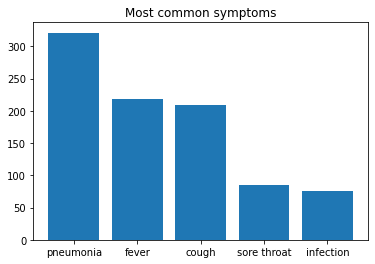

In [18]:
# Note: to run the actual code, please uncomment and run:
# get_symptoms_data(covid_dialogue_df, finetuned_model)

The results for Icliniq dialogue:

100%|██████████| 5678/5678 [13:57<00:00,  6.78it/s]


Skipped sentences:  33
{'pain': 182, 'anxiety': 47, 'fever': 41, 'bleeding': 39, 'infection': 37}


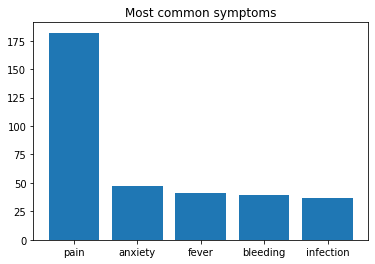

In [19]:
# Note: to run the actual code, please uncomment and run:
# get_symptoms_data(icliniq_dialogue_short_df, finetuned_model)

### 3.4.3. Error Analysis <a class="anchor" id="3.4.3"></a>

This section will discuss error analysis on the finetuned model. 

In [20]:
# COVID dataset

TP = eval_finetuned_covid[1][0]
FP = eval_finetuned_covid[1][1]
gt = eval_finetuned_covid[2]

print('Total:', gt)
print('TP: ', TP)
print('FP: ', FP)

Total: 303
TP:  262
FP:  41


For the COVID Dialogue dataset, it can be seen that the total of ground truth numbers is 303. Of those 303 ground truth symptoms, 262 are correctly predicted while only 41 are wrongly predicted. In the code below, two examples are illustrated. 

In the first sentence, the symptom 'bloody urine' is not predicted by the model. It could be that bloody urine is a symptom that is not frequent in PubMed papers, which is why the model doesn't recognize it as a symptom. 

In the second sentence, the symptoms 'heart beating fast' and 'breathing harder', are only partly predicted or not predicted at all. The reason for this could be that this sentence is quite large and is full of symptoms. It could be that the model is not used to predicting so many symptoms at once in one sentence. 

In [21]:
from pprint import pprint

test_sentences = [
    'During that time, he would urinate bloody urine into the foley.',
    'Friday march 20- 10 AM I woke up with some chest pains (chest area above the stomach), then some coughing and feeling a little sick, little lightheaded, heart beating fast, breathing harder, felt of shortness of breath.'
]

prediction = finetuned_model.predict(test_sentences)

pprint(prediction)

[{'entity': [],
  'sentence': 'During that time, he would urinate bloody urine into the '
              'foley.'},
 {'entity': [{'mention': 'chest pains',
              'position': [43, 54],
              'probability': 0.9601119756698608,
              'type': 'disease'},
             {'mention': 'coughing',
              'position': [97, 105],
              'probability': 0.8759049773216248,
              'type': 'disease'},
             {'mention': 'sick',
              'position': [127, 131],
              'probability': 0.9835519194602966,
              'type': 'disease'},
             {'mention': 'lightheaded',
              'position': [140, 151],
              'probability': 0.9802555839220682,
              'type': 'disease'},
             {'mention': 'beating',
              'position': [159, 166],
              'probability': 0.6835682988166809,
              'type': 'disease'},
             {'mention': 'shortness of breath',
              'position': [199, 218],
           

In [22]:
# Icliniq dataset

TP = eval_finetuned_icliniq[1][0]
FP = eval_finetuned_icliniq[1][1]
gt = eval_finetuned_icliniq[2]

print('Total:', gt)
print('TP: ', TP)
print('FP: ', FP)

Total: 201
TP:  172
FP:  29


For the Icliniq dataset there are 201 total ground truth symptoms. From these 201, 172 are correctly predicted and 29 are wrongly predicted. The ratio of correctly and wrongly predicted symptoms is more or less the same as the COVID dataset, which is why specific examples will not be discussed. 

## 3.5. Findings <a class="anchor" id="3.5"></a>

### 3.5.1. Illustration <a class="anchor" id="3.5.1"></a>

In the first plot (on the left), you can see the results for the COVID-19 dialogue again, and in the second plot (on the right), you can see the results for the Icliniq dialogue again. It can be seen that both results include the symptoms 'fever'.

<table><tr><td><img src='RQ1/most_common_symptoms_covid.jpeg'></td><td><img src='RQ1/most_common_symptoms_icliniq.jpeg'></td></tr></table>

### 3.5.2. Interpretation <a class="anchor" id="3.5.2"></a>


The results show that pneumonia, fever, cough, sore throat, and flu are the most common symptoms that patients and doctors talk about in COVID-19 related medical interviews. This seems valid because they all actually are symptoms of COVID-19. Pneumonia is the most used symptom here, whereas before COVID-19, the most used symptom was pain. This also seems valid, because in very general interviews (with general topics) pain can be used to describe various areas. Furthermore, before COVID-19 the most used symptoms include anxiety, bleeding, fever and infection. It is clear that the symptoms went from quite general, to more ‘throat’ and ‘lung’ specific symptoms.

It can be seen that fever was already an important symptom in medical interviews. With COVID-19 it became even more important. Furthermore, pain, anxiety, bleeding and infection made way for pneumonia, cough, sore throat and flu.



### 3.5.3. Discussion <a class="anchor" id="3.5.3"></a>
The results for this research can, of course, not be generalized to all medical interviews because just a subset of all data is used for this research.

Also, because the data to determine the accuracy and the data to finetune the model has been annotated by hand by a non-professional, it could be the case that the model can perform better than it does now. For example, it could be that some symptoms were missed because the annotator was not familiar with them.

Furthermore, a model like RoBERTa can be finetuned on a lot of data. The Transformers architecture allows for parallel computing, which is why a lot of data can be used while still being fast in training. For this research, a small amount of data is used for fine-tuning due to the scope of the project. It is possible that accuracy can be improved by fine-tuning the model on more data.

## 3.6. Conclusion <a class="anchor" id="3.6"></a>

### 3.6.1. Summary <a class="anchor" id="3.6.1"></a>
To determine the most common symptoms in a medical dialogue before and after COVID-19 a pre-trained RoBERTa model is finetuned and used to extract symptoms from a given text sequence. These symptoms are then collected and counted, whereafter the top 5 most common symptoms are extracted and displayed. It can be stated that the most common symptoms in COVID-19 dialogue are pneumonia, fever, cough, sore throat and infection. Whereas that used to be pain, anxiety, bleeding, fever and infection. It is clear that the symptoms went from quite general, to more ‘throat’ and ‘lung’ specific symptoms. Even though the results might not be generalized to all medical interviews out there, symptom-tracking could still be a useful tool for summarizing medical interviews or quickly displaying common symptoms for a certain disease in conversation.

### 3.6.2. Lessons learned <a class="anchor" id="3.6.2"></a>
For automatic symptom recognition, two important lessons are learned. First of all, a BERT model can be used for a variety of NLP tasks. At the core of a BERT model lies a strong Transformers model that uses bidirectionality to get to know a word and its context for a deep understanding of the word. Second, an automatic symptom recognizer and visualizer can give a glimpse of the topics discussed in medical dialogue. If the dialogue is about a certain disease, the corresponding symptoms could easily be found and displayed. This could be used to interpret the disease. If the dialogue is about more or general diseases, the extracted symptoms can be used to represent the topics of the dialogue. All in all it can be said that automatic symptom extraction and visualization can be a handy tool for visually representing the main topics of medical dialogues.

### 3.6.3. Directions for future work <a class="anchor" id="3.6.3"></a>
For future work in healthcare NLP it is important to have more data available. It is a tricky issue, mainly because of privacy and intimate topics. However, more data could contribute to better models for medical NLP tasks. 

For better accuracy scores, the pre-trained RoBERTa model could be finetuned on more data. For this project it was finetuned on approximately 200 extra sentences, resulting in a slightly better accuracy score. Using more data therefore seems promising for a better accuracy score.

Furthermore, the model that is currently used is trained on PubMed data that is annotated for chemicals and diseases. In the future, a dataset could be developed that is only focussed on symptoms (called disease in PubMed annotation). If the same model would then be trained on this annotated data, recognizing symptoms might give a more accurate score since the only focus of the model would then be on symptoms.


# 4. RQ2 - Sentiment Analysis <a class="anchor" id="4"></a>
To measure how COVID-19 has influenced emotions in medical interviews, we have to perform Sentiment Analysis (SA). Sentiment Analysis extracts the sentiments from each utterance or the whole dialogue. The sentiment labels are positive, negative or neutral, but could also represent emotions such as angry and happy. For this report, I use the following emotions: anger, fear, joy, sadness, and surprise. Each dialogue can contain none, some, or all of these emotions, which needs a multi-label classification model to annotate the dialogues. 
This [section](#4) first discusses related literature and then describes an additional dataset that I use to annotate the medical interviews, build a multi-label classification model, and compare the distribution of both datasets' emotions.

## 4.1. Related Literature <a class="anchor" id="4.1"></a>

A word can be associated with a range of emotions. For example, the word 'lovely' can be associated with the emotions of joy and surprise. However, the intensity of joy is higher than the intensity of surprise. [Mohammad (2017)](https://saifmohammad.com/WebDocs/word-affect-intensities.pdf) created the [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) with scores of association/intensity with a best-worst scaling (BWS) technique. The lexicon contains general English words and social media (mainly Twitter) related words. For each word and emotion, a score between 0 and 1 is assigned. A score of 1 means that the emotion has the highest amount of intensity for a  word. A score of 0 means that the emotion has the lowest amount of intensity for a word. 

[Jelodar et al. (2021)](https://arxiv.org/pdf/2101.06484.pdf) created a framework for detecting emotions using COVID-19 related tweets. For annotating their data with emotions, they used the [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm). For each emotion, they sum the intensity score of the words associated with it. This way, if an emotion occurs more often or with a higher intensity score, the total emotion association score will be higher and thus weighted more. Their emotion detection system is based on a convolutional neural network (CNN) and contains embedding, convolution, and filter layers. One of the major emotions detected in the tweets was anticipation, which might indicate that anticipation plays a role in dealing with the stress caused by COVID-19.

## 4.2. Experimental Setup <a class="anchor" id="4.2"></a>

The datasets are not annotated with emotions yet. It is time-consuming to label each dialogue with emotions by hand. In this report, the solution is to use the [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) to annotate the dialogues. First, I annotate the data with the labels created during the preprocessing. Then I build a multi-label classification model to train with these annotations.
Before building and training a (supervised) multi-label classification model, the data needs to be converted to a numerical representation and labeled with emotions. [Section 4.2.3.](#4.2.3) explains the methods for cleaning, converting, and labeling the data. [Section 4.2.4.](#4.2.4) builds the multi-label classification model and [section 4.3.2.](#4.3.2) shows how the datasets are annotated.

### 4.2.1. Additional Data <a class="anchor" id="4.2.1"></a>

#### NRC Emotion Intensity Lexicon
The [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) contains intensity scores for eight emotions: anger, fear, joy, sadness, disgust, trust, anticipation, and surprise. 
To simplify the multi-label classification model in this report, I only use five of these emotions: anger, fear, joy, sadness, and surprise. For each emotion, there is a file containing two columns. The first column contains general words (e.g., furious, blessed), and the second column contains a score (e.g., 0.929, 0.833).
An example of the joy file:
```
pleasure    0.803
fulfilled   0.667
unhappiness 0.016
```
#### Global Vectors for Word Representation
Global Vectors for Word Representation [(GloVe)](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) is a method for creating vector representations for words. Word embeddings convert textual data into numerical data, where similar words have similar vectors. Generating these embeddings can take a while. [glove.6B](https://nlp.stanford.edu/projects/glove/) contains pre-trained word vectors, which are used for this report.


### 4.2.2. Preliminaries <a class="anchor" id="4.2.2"></a>
The preprocessed data, variables, and trained model used in this [section](#4) are stored in the `RQ2/saved` folder to reduce this notebook's running time. Additionally, the `RQ2_utils.py` script compiles the import of libraries and the functions.

In [1]:
import RQ2_utils as RQ2

# path to content of the saved folder
saved_path = 'RQ2/saved/'

However, some scripts in this [section](#4) make it possible to run the code locally. To do this, you need to take the following steps:
1. Download the NRC Emotion Intensity Lexicon [here](https://saifmohammad.com/WebPages/AffectIntensity.htm). 
2. The download folder contains the `OneFilePerEmotion` folder. Place the `anger-score.txt`, `fear-score.txt`, `joy-score.txt`, `sadness-score.txt`, `surprise-score.txt` files in the `RQ2/emotions` folder.

3. Download the pre-trained word vectors from `glove.6B.zip` [here](https://nlp.stanford.edu/projects/glove/). This might take a while.
4. Place only the file `glove.6B.100d.txt` from the download folder in the `RQ2/glove` folder.


This notebook loads these files from the `RQ2/emotions` and `RQ2/glove` folders.
The following script, when uncommented, accesses the paths to the required folders and files to run the code locally.

In [ ]:
# emotions_path = 'RQ2/emotions/'
# GloVe_path = 'RQ2/glove/'
# COVID_file = 'data/COVID-Dialogue-Dataset-English.txt'
# MED_file = 'data/icliniq_dialogue.txt'
# paths = [emotions_path, GloVe_path, COVID_file, MED_file, saved_path]

### 4.2.3. Preprocessing <a class="anchor" id="4.2.3"></a>

The function `create_emotions()` shown below extracts the words and scores from each [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) file and places the lemmatized words with scores above 0.6 in a dictionary with the emotion as a value. The five unique emotions are also saved as the variable `unique_emotions`.

```Python
def create_emotions(emotions_path):
    """
    Input: file path.
    Returns list of unique emotions and dictionary with as key a word
    and as value the corresponding emotion.
    """
    emotions = dict()
    unique_emotions = []
    lemmatizer = WordNetLemmatizer()
    _, _, files = next(walk(emotions_path))
    
    # Process each emotion-score file in the folder.
    for file in files:
        emotion = file.replace('-scores.txt', '')

        # Add emotion to the list of unique emotions.
        unique_emotions.append(emotion)

        with open(emotions_path+file, 'r') as f:
            for line in f:
                word, p = line.split('\t')

                # Add word to dictionary if the intensity score is greater than 0.6.
                if float(p) > 0.6:
                    word = lemmatizer.lemmatize(word)
                    emotions[word] = emotion
    return unique_emotions, emotions
```

The dialogues are preprocessed by removing noise, such as URLs and punctuation, lemmatizing each word with the [WordNet Lemmatizer](https://www.nltk.org/_modules/nltk/stem/wordnet.html), and removing the stopwords. While lemmatizing, I only keep the nouns, adjectives, and verbs to reduce the representation's complexity.
Then, the dialogues are annotated with emotions using the emotion dictionary mentioned above. The function `annotate_with_lexicon()` does the annotation. For each word that also occurs in the `emotions` dictionary, the corresponding emotion is added to the label. Some labels contain multiple occurrences of the same emotion. This is reduced to the set of emotions in the label for the multi-label classification model. For example, the label `[anger, anger, fear, joy, joy]` results in the set `(anger, fear, joy)`, which are later also binarized for the multi-label-classification model.

```Python
def annotate_with_lexicon(text, emotions):
    """
    Input: text = list of tokens, emotions = dictionary with as key a word
    and as value the corresponding emotion.
    Returns set of emotions associated with the text.
    """
    return set([emotions[token] for token in text if token in emotions.keys()])
```

Before adding the dialogue and label to a DataFrame, I check if they are already in the DataFrame. If one instance of the duplicate data occurs in the training set and the other instance in the test set, the evaluation methods can cause incorrect results. To prevent incorrect results, I add dialogues that are not already in the DataFrame. The function `process_dataset()` combines the steps described above. The function `preprocessing()` preprocesses and merges both datasets.


```Python
def process_dataset(path, emotions):
    """
    Input: path = file path, emotions = dictionary with as key a word
    and as value the corresponding emotion.
    Returns Dataframe with preprocessed text and binarized labels.
    """
    # Get dialogues from file.
    dialogues = split_on_dialogue(path)
    labelled = []
    
    # Process each dialogue.
    for d in dialogues:
        
        # Remove noise and lemmatize tokens
        text = clean_text(d)
        
        # Annotate dialogues with lexicon
        label = annotate_with_lexicon(text, emotions)
        
        # Add tuple of text and label to list if it is not in list yet.
        if (text, label) not in labelled:
            labelled.append((text, label))

    # Create Dataframe of list with tuples.
    df = create_df(labelled)

    return df
```

The function `embedded_vectors()` converts the preprocessed data to embedded vectors with the [Tokenizer](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer). 
The [GloVe word embeddings](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) convert the data to their numerical representation.

```Python
def embedded_vectors(GloVe_path, X_train, X_test):
    """
    Input: GloVe_path = file path, X_train = text of training set,
    X_test = text of test set.
    Returns numerical representation of X_train and X_test, vocabulary size, matrix
    and tokenizer
    """
    # Initialize tokenizer
    tokenizer = Tokenizer()
    
    # Fit tokenizer on train set.
    tokenizer.fit_on_texts(X_train)

    # Convert train and test set.
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test = tokenizer.texts_to_sequences(X_test)

    # Pad train and test set to lenght of 200.
    X_train = pad_sequences(X_train, padding='post', maxlen=200)
    X_test = pad_sequences(X_test, padding='post', maxlen=200)

    # Get size of vocabulary.
    v_size = len(tokenizer.word_index) + 1

    embed_dict = dict()
    
    # Get files from GloVe folder.
    _, _, files = next(walk(GloVe_path))

    # Read each GloVe file into a dictionary.
    for file in files:
        with open(GloVe_path+file, 'r') as file:
            for line in file:
                records = line.split()
                embed_dict[records[0]] = np.asarray(records[1:], dtype='float32')

    # Create weight matrix.
    matrix = np.zeros((v_size, 100))
    for word, index in tokenizer.word_index.items():
        vector = embed_dict.get(word)
        if vector is not None:
            matrix[index] = vector

    return X_train, X_test, v_size, matrix, tokenizer
```
The function `converting()` combines the following techniques. First, splitting the data into training and test sets. Secondly, converting them to a numerical representation used for training and evaluating the multi-label classification model. 

The function `convert_df_to_num()` converts both DataFrames to a numerical representation for annotating the data with the trained model. The training and test set, DataFrames, and variables used for this report are stored in the `RQ2/saved` folder.

The following script will load the saved annotated DataFrames, training and test set, and variables used for this report.

In [2]:
COVID_df, MED_df = RQ2.load_dfs(saved_path)
C_vec, M_vec = RQ2.load_vectors(saved_path)
X_train, X_test, y_train, y_test = RQ2.load_x_y(saved_path)
unique_emotions, v_size, matrix = RQ2.load_variables(saved_path)

The following script, when uncommented, runs the preprocessing locally. This takes approximately 10 minutes. __However__, this step should only be run locally if you also run the classification model locally. The numerical representation of the data can differ because of the training and test set's random splitting, which influences the classification model negatively.

In [3]:
# %%time
# COVID_df, MED_df, unique_emotions, merged_df = RQ2.preprocessing(paths)
# X_train, X_test, y_train, y_test, v_size, matrix, tokenizer = RQ2.converting(merged_df, unique_emotions, paths)
# C_vec, M_vec = RQ2.convert_df_to_num(tokenizer, COVID_df, MED_df)

### 4.2.4. Multi-Label Classification Model <a class="anchor" id="4.2.4"></a>

The function `create_model()` creates a multi-label classification model with the vocabulary size and word embeddings matrix created during the preprocessing. The model is created with the [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/Model) library and has one input layer, one embedding layer, and one [Long Short-Term Memory](https://keras.io/api/layers/recurrent_layers/lstm/) (LSTM) layer. The model also has five dense output layers with a sigmoid activation function. Each output layer corresponds to one of the emotions and returns a value between 0 and 1.
```Python
def create_model(v_size, matrix):
    """
    Input: vocabulary size and weight matrix.
    Returns multi-label classification model.
    """
    input_1 = Input(shape=(200,))
    embedding_layer = Embedding(v_size, 100, weights=[matrix],
                                trainable=False)(input_1)
    LSTM_Layer1 = LSTM(128)(embedding_layer)

    output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
    output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)

    model = Model(inputs=input_1, outputs=[output1, output2, output3, output4,
                                           output5])
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['acc'])

    return model
```

The function `main_model()` creates and trains the model on the training set with 300 epochs.

The following script loads the saved model and history.

In [4]:
model = RQ2.load_trained_model(saved_path,'multilabel_model.h5')
history = RQ2.load_history(saved_path,'history.txt')

The following script, when uncommented, creates and trains the model locally. This takes approximately 10 minutes. This step can be run locally even when the preprocessed data is loaded from `RQ2/saved`.

In [5]:
# %%time
# model, history = RQ2.main_model(X_train, y_train, v_size, matrix, 300)
# history = history.history

The following script shows the summary of the multi-label classification model.

In [6]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 200, 100)     759100      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          117248      embedding[0][0]                  
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            129         lstm[0][0]                       
_______________________________________________________________________________________

## 4.3. Evaluation <a class="anchor" id="4.3"></a>
### 4.3.1. Metrics <a class="anchor" id="4.3.1"></a>
The following scripts show the loss and accuracy values for each output layer with the training and validation sets.

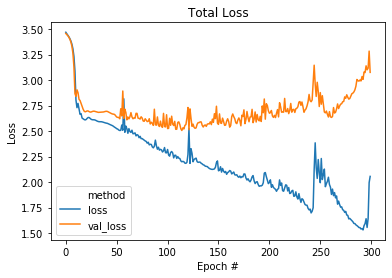

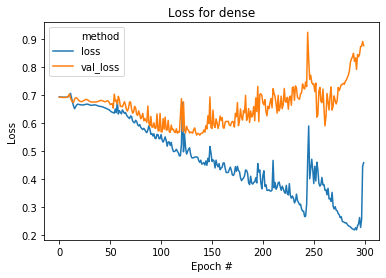

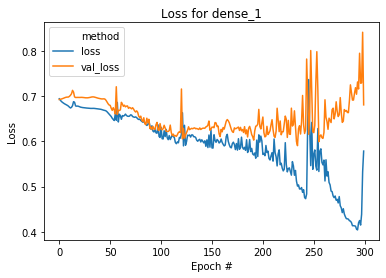

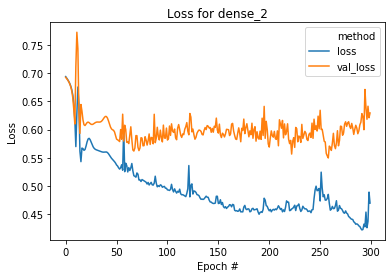

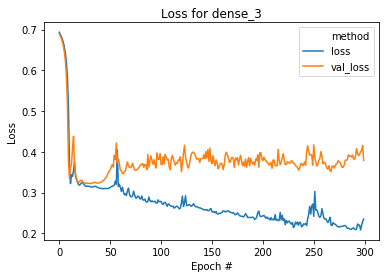

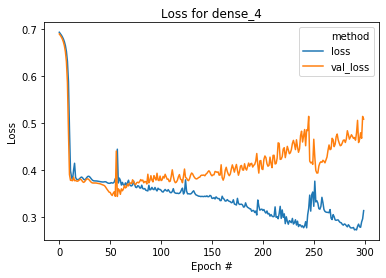

In [7]:
RQ2.plot_loss(history)

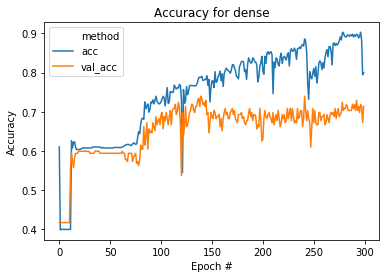

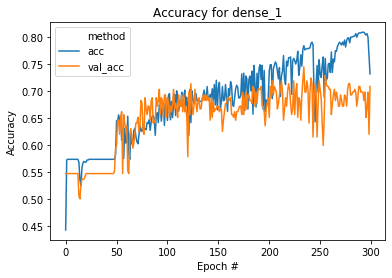

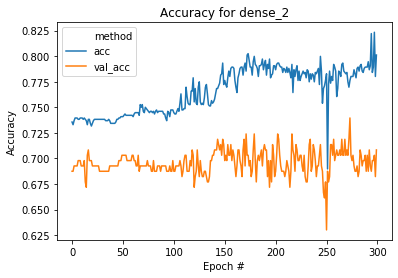

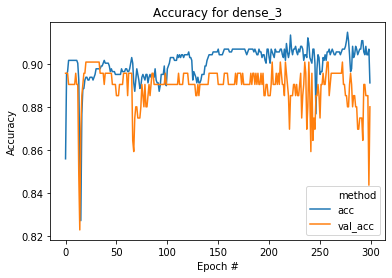

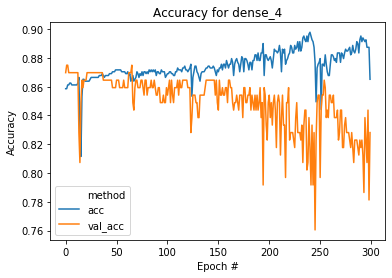

In [8]:
RQ2.plot_acc(history)

The following script evaluates the performance of the model on the test set and shows the loss and accuracy for each dense output layer.

In [9]:
RQ2.evaluate_model(model, X_test, y_test)

8/8 [==============================] - 1s 75ms/step - loss: 3.1864 - dense_loss: 0.9217 - dense_1_loss: 0.8586 - dense_2_loss: 0.5812 - dense_3_loss: 0.4881 - dense_4_loss: 0.3368 - dense_acc: 0.7000 - dense_1_acc: 0.6375 - dense_2_acc: 0.7292 - dense_3_acc: 0.8542 - dense_4_acc: 0.8958

Total loss:  3.186393976211548

dense loss:  0.9216840267181396
dense accuracy:  0.699999988079071

dense_1 loss:  0.8586356043815613
dense_1 accuracy:  0.637499988079071

dense_2 loss:  0.5812143683433533
dense_2 accuracy:  0.7291666865348816

dense_3 loss:  0.4880685806274414
dense_3 accuracy:  0.8541666865348816

dense_4 loss:  0.3367917239665985
dense_4 accuracy:  0.8958333134651184


### 4.3.2. Results <a class="anchor" id="4.3.2"></a>
The dialogues were first annotated with the function `annotate_with_lexicon()`. This function annotated the dialogues with the unique emotions extracted from the [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm).

The following script first convert the Dataframes to a dictionary for easy plotting. Then, shows the distribution of emotions for both datasets with the lexicon annotation method.

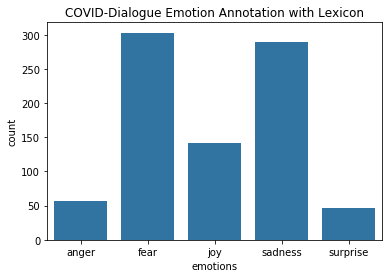

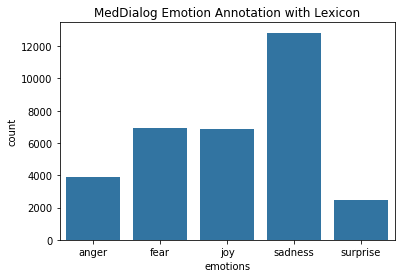

In [10]:
COVID_lexicon = RQ2.convert_df_to_dict(COVID_df)
MED_lexicon = RQ2.convert_df_to_dict(MED_df)
RQ2.plot_annotation(COVID_lexicon, 'COVID-Dialogue Emotion Annotation with Lexicon')
RQ2.plot_annotation(MED_lexicon, 'MedDialog Emotion Annotation with Lexicon')

The multi-label classification model that trained on the annotation above predicts the annotations of all the dialogues in the function `annotate_with_model()`

```Python
def annotate_with_model(X, model, unique_emotions):
    """
    Input: X = numerical representation of the dialogues,
    model = trained muti-label classification model,
    unique_emotions = list of unique emotions
    Returns dictionary with as key the emotion and as value the amount
    of occurences in the dataframe.
    """
    # Predict labels with trained model.
    y = model.predict(X)
    annotated = dict()
    
    # For each emotion, add emotions to dictionary with as value the amount
    # of occurences in the dataframe.
    for i in range(len(y)):
        
        # Only add emotion if prediction is equal or greater than 0.5.
        annotated[unique_emotions[i]] = len([p for p in y[i] if p >= 0.5])

    # Return sorted dictionary.
    return OrderedDict(sorted(annotated.items()))
```

The following scripts perform the annotation with the trained model and shows the distribution for both datasets.

In [11]:
%%time
COVID_model = RQ2.annotate_with_model(C_vec, model, unique_emotions)
MED_model = RQ2.annotate_with_model(M_vec, model,unique_emotions)

CPU times: user 1min 24s, sys: 6.34 s, total: 1min 30s
Wall time: 38 s


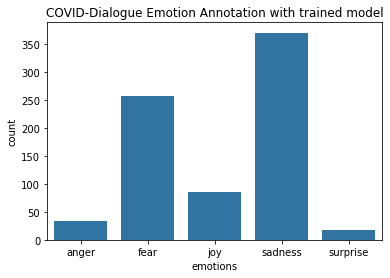

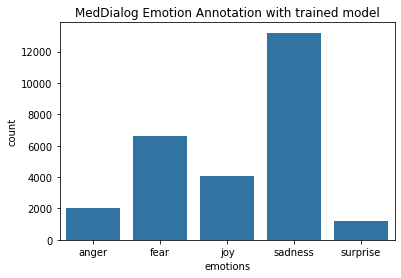

In [12]:
RQ2.plot_annotation(COVID_model, 'COVID-Dialogue Emotion Annotation with trained model')
RQ2.plot_annotation(MED_model, 'MedDialog Emotion Annotation with trained model')

### 4.3.3. Error Analysis <a class="anchor" id="4.3."></a>

The following script compares the annotation before and after COVID-19 using only the lexicon and only the multi-label classification model. The figures are created with the function `compare_annotation()`

```Python
def compare_annotation(a, a_model, title):
    """
    Input: a = annotion with lexicon, a_model = annotation with trained model,
    title = title for the figure.
    Plots annotation differences of a dataset.
    """
    # Initialize Dataframe to plot.
    df = pd.DataFrame(columns=['method', 'emotion', 'count'])

    # Add annotations to the dataframe.
    for emotion, count in a.items():
        df = df.append({'method': 'lexicon', 'emotion': emotion,
                        'count': count}, ignore_index=True)
    for emotion, count in a_model.items():
        df = df.append({'method': 'trained model', 'emotion': emotion,
                        'count': count}, ignore_index=True)

    # Plot Dataframe.
    sns.barplot(x='emotion', y='count', data=df, hue='method').set_title(title)
    plt.show()
```

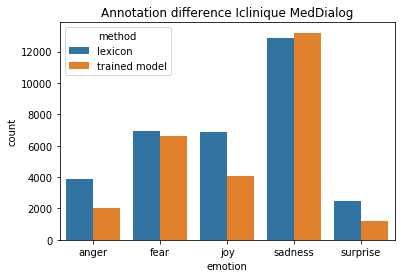

In [13]:
RQ2.compare_annotation(MED_lexicon, MED_model, 'Annotation difference Iclinique MedDialog')

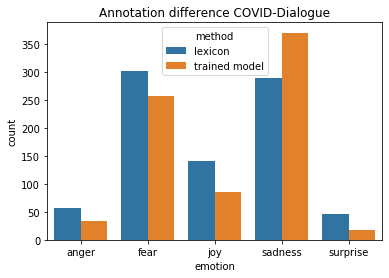

In [14]:
RQ2.compare_annotation(COVID_lexicon, COVID_model, 'Annotation difference COVID-Dialogue')

The figures above show that the model predicts slightly different annotations. For both datasets, the model annotates more dialogues with sadness and fewer dialogues with anger, fear, joy, and surprise. This can be explained by the fact that dialogues with the emotion sadness occur more often in both datasets. Randomly reducing the size of the [Iclinique MedDialog dataset (English)](https://github.com/UCSD-AI4H/Medical-Dialogue-System) to the size of the [COVID-Dialogue-Dataset-English](https://www.kaggle.com/xuehaihe/covid-dialogue-dataset?select=COVID-Dialogue-Dataset-English.txt) during preprocessing can easily result in a dataset only or majorly containing dialogues with the emotion sadness. This way, the model gets biased and annotates much more dialogues with sadness.

## 4.4. Findings <a class="anchor" id="4.4"></a>

To compare the emotion distribution between the datasets the following function `compare_emotions()` is used.

```Python
def compare_emotions(MED, COVID, title):
    """
    Input: ED = dictionary with as key the emotion and as value the amount
    of occurences in the dataframe for the MedDialog dataset,
    COVID = dictionary with as key the emotion and as value the amount
    of occurences in the dataframe for the COVID dataset,
    title = title for the figure.
    Plots emotion distribution.
    """
    # Normalize dictionaries.
    MED = OrderedDict(sorted(normalize_dict(MED).items()))
    COVID = OrderedDict(sorted(normalize_dict(COVID).items()))

    # Create Dataframe to plot.
    df = create_plot_df(MED, COVID)

    # Plot emotion distribution.
    sns.barplot(x='emotion', y='percentage', data=df, hue='dataset').set_title(title)
    plt.show()
```

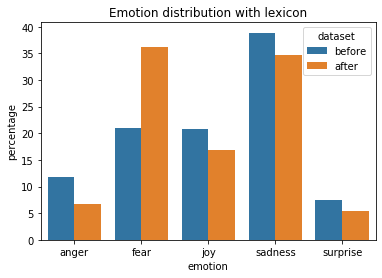

In [15]:
RQ2.compare_emotions(MED_lexicon, COVID_lexicon, 'Emotion distribution with lexicon')

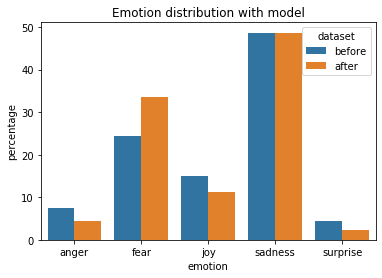

In [16]:
RQ2.compare_emotions(MED_model, COVID_model, 'Emotion distribution with model')

The figures above show how the emotions in medical interviews are distributed in percentages before and after COVID-19. Using percentages instead of the actual count is because [Iclinique MedDialog dataset (English)](https://github.com/UCSD-AI4H/Medical-Dialogue-System) has significantly more dialogues than [COVID-Dialogue-Dataset-English](https://www.kaggle.com/xuehaihe/covid-dialogue-dataset?select=COVID-Dialogue-Dataset-English.txt). The distributions in the first figure are annotated only using the NRC lexicon. As can be seen, anger, joy, sadness, and surprise decreased, and fear increased after COVID-19. The trained multi-label classification model annotates the distributions in the second figure. This figure shows similar results, except for the occurrence of sadness that relatively stays the same before and after COVID-19.

## 4.5. Conclusion <a class="anchor" id="4.5"></a>
This section performed Sentiment Analysis by building a multi-label classification model to annotate each medical interview with the emotions: anger, fear, joy, sadness, and surprise. The distribution of emotions in both datasets shows that these interviews generally have negative sentiments if we consider anger, fear, and sadness as negative emotions. The results show that COVID-19 has created more fear in the medical interviews, and therefore the sentiment became more negative. Analyzing changes in sentiment before and after COVID-19 might give insight into how the patients perceive medical interviews and the best way to approach them. Given the results, patients are more anxious. A calming and reassuring approach from the doctors might better the mood of the patients.

The [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) is quite useful to annotate the data with emotions. As shown in [section 4.4.](#4.4), the emotion distribution with the lexicon does not differ much from the emotion distribution with the trained model. If the [NRC Emotion Intensity Lexicon](https://saifmohammad.com/WebPages/AffectIntensity.htm) is also trained on medical data it might even yield better results.

There are two possible adjustments to improve the performance of the multi-label classification model. The first adjustment is to assign weights to each emotion in a label. Some dialogues contain multiple words belonging to the same emotion. For example, there are two words in the dialogue representing anger and eight words: joy. The current model uses the label `[anger, joy]` and treats both emotions as equal. Instead, we want a model that weighs the label `[anger, joy]` as `[0.2, 0.8]`, so joy becomes the dialogue's major emotion. The second adjustment should be the use of a balanced dataset to prevent a biased model. [Section 4.3.2.](#4.3.2) shows that the emotions fear and sadness occurs more often than the other emotions, which causes a biased model.

## 5. RQ3 - Question Classification <a class="anchor" id="5"></a>

This section's research question is: What types of questions are asked before and after COVID-19 in medical interviews?

The code below, if given a list of questions asked by patients to doctors, will classify each of those questions in one of seven categories: Demographic related, Disease-related, Treatment-related, Pregnancy-related, Goal-oriented, Family-related, or Socializing related.

For example:

"Hi doctor,
What is polyclonal hypergammaglobulinemia? Can it be related to leukemia?"

would be classified as disease-related, as the question is about leukemia.


## 5.1. Related Literature <a class="anchor" id="5.1"></a>

Loni  (2011) gives an overview of the state or question classification tasks as of 2011. They discuss the state of the field concerning various design decisions. The most prominent question taxonomy used was that of  Li & Roth(2002) This taxonomy divided questions into six broad categories which are subdivided into 50 fine categories (see table 1). At the time, the decision models used were mostly support vector machines, maximum entropy models, and language models.

| Course Class | Fine Classes   |
|:-------|:---|
|    ABBR| abbreviation, expansion|
|DESC| definition, description, manner, reason|
| ENTY| animal, body, color, creation, currency, disease, event, food, instrument, <br> language, letter, other, plant, product, religion, sport, substance, symbol,<br> technique, term, vehicle, word |
|HUM |description, group, individual, title |
|LOC| city, country, mountain, other, state |
|NUM | code, count, date, distance, money, order, other, percent, percent, period,<br> speed, temperature, size, weight | 

Jalan et al. (2018) use deep learning techniques with weak supervision to classify questions from a task first proposed at ICHI 2016. However, there seems to be no information about this task outside of Jalan et al. (2018). The task consists of medical forum posts, each tagged with one of seven labels based on the intent of the user. The winning team at the ICHI 2016 conference achieved a 68.00\% accuracy, with a combination of the classifications of a random forest, support vector machines, logistic regression, and a convolutional neural network. Jalan et al. (2018) achieve a 71.13\% accuracy score through the classifications of a hierarchical bidirectional LSTM, a deep network based on TFIDF vectors, and a deep network based on the “Strength of Association'' of a class with certain multi-word medical entities.

Lewis et al. (2020) compare the performance of various pre-existent models pre-trained on medical and clinical data on various medical tasks, such as named entity recognition and text classification tasks. They also compare the models with a general-purpose RoBERTa model as a baseline and create a model of their own. They show that models trained on domain-specific knowledge consistently outperform a RoBERTa baseline of the same size, with BioBERT doing best. Even so, a larger RoBERTa model still outperforms them on clinical tasks but not on PubMed-based tasks.


## 5.2. Experimental Setup <a class="anchor" id="5.2"></a>

### 5.2.1. Additional Data <a class="anchor" id="5.2.1"></a>

#### ICHI 2016 dataset
To classify the patients’ questions in the MedDialog and COVID datasets, our model was first pre-trained on the ICHI 2016 question qualification dataset, as discussed by Jalan et al. (2018). This dataset was sourced from the zip file made available in Jalan et al. (2018) with their code and the data (https://tinyurl.com/medCat18). The dataset is made up of questions sourced from a medical forum. This is different from the MedDialog and COVID Datasets, which are both sourced from websites in which people can ask actual doctors medical questions. Still, they are quite similar as both mostly consist of normal people asking for help with a medical issue. This is advantageous because the more similar the two datasets are, the more likely the results in one are to carry over to the other. Furthermore, most other question datasets consist of shorter questions instead of the longer multi-sentence questions asked in both the ICHI and MedDialog Datasets.

The dataset consists of a train and a test dataset,  both of which consist of the class labels, a title, and the full question. For the model input, the string of the title and the full question were combined, as was done by Jalan et al (2018). Jalan et al. (2018) describe the question taxonomy as follows:

- Demographic (DEMO): Questions targeted towards specific demographic sub-groups characterized by age, gender, profession, ethnicity, etc
- Disease (DISE): Questions related to a specific disease.
- Treatment (TRMT): Questions related to a specific treatment or procedure.
- Goal-oriented (GOAL): Questions related to achieving a health goal, such as weight management, exercise regimen, etc.
- Pregnancy (PREG): Questions related to pregnancy, difficulties with conception, mother and unborn child’s health during pregnancy.
- Family support (FMLY): Questions related to issues of a caregiver (rather than a patient), such as support of an ill child or spouse.
- Socializing (SOCL): Questions related to socializing, including hobbies and recreational activities, rather than a specific health-related issue.


For each of these classes, there are roughly the same amount of questions.


#### Annotated Data

Apart from the ICHI dataset, I have also annotated 100 samples from both the icliniq and the COVID datasets with the classes from the ICHI 2016 dataset. The annotating process was not ideal, as the original guidelines used to annotate the ICHI dataset were not available. Because of this, trying to reverse engineer the thought process is quite difficult and requires you to look at the ICHI datasets to what sort of questions are assigned to each class. This is quite time-consuming. Because of this, we have opted to have only one person annotate the data. 

Still, even if there was no time for the other group members to analyse the ICHI data, I could have created annotation guidelines that follow the patterns I noticed. We opted not to do this either. This is because even though annotating with more people makes mistakes less likely and can provide better answers in case questions are ambiguous. It seems in this case that it would be more likely that the guidelines I made would be misinterpreted than it would be for me to have made a significant amount of mistakes annotating.


### 5.2.2. Approach <a class="anchor" id="5.2.2"></a>

To classify the questions, we use Microsoft’s PubMedBERT(Gu et al., 2020), which is based on the BERT(Devlin et al.,  2018) architecture. BERT is a large deep learning model pre-trained on the BooksCorpus dataset and English Wikipedia. The major difference between BERT and the models that came before it is that BERT uses context from both before and after a word to predict it, while earlier models mostly only used context from before a word. This allowed it to perform better than many of the similar models that came before it. To use BERT (or similar models pre-trained on large corpora)  for a task that it was not originally trained for, one has to finetune it. This means swapping out the input and output layers for ones appropriate for the new task and then training it on the new data. This two-step approach allows models such as BERT to first learn about the language, and then learn about the specific task you want it to perform, instead of having to do both at once, like was the case with older types of deep learning models. This pretraining step where the model essentially learns the language is not restricted to literally just learning a language like English, French, or Portuguese. One can also use this step to learn about domain-specific knowledge, which means you learn a version of English relevant to a certain type of task.
 
PubMedBERT is a version of BERT that does the same for medical research and biomedical data. Instead of BooksCorpus and English Wikipedia, it is trained on abstracts from PubMed and full papers from PubMedCentral. This allows it to perform better than BERT on biomedical tasks, and even better than models that first train on BooksCorpus and Wikipedia and then on PubMed. As it is based on BERT, PubMedBERT can, in principle, also be trained to perform any specific task, while retaining and making use of its medical domain knowledge.
 
PubMedBERT and other models based on BERT use full-text excerpts to train on. This is why, aside from tokenization with the PubMedBert tokenizer, further preprocessing of the data is not needed. 


### 5.2.3. Implementation <a class="anchor" id="5.2.3"></a>

The implementation of the PubMedBERT model used here relies on Hugging Face’s transformers library (Wolf et al., 2020) and PubMedBERT, as found on huggingface’s model hub. Furthermore, most of the code used for the training of the model was adapted from [the fine-tuning tutorial](https://huggingface.co/transformers/master/custom_datasets.html) in the transformers documentation for this specific task.

Aside from the code shown in this notebook, we also use functions defined in RQ3_utils.py. This file contains several functions for preparing the data for use in the model. It also defines a compute_metrics function that the model uses to calculate accuracy and the precisions, recall and f1 score for each class. Lastly, it contains functions for creating the data visualizations shown in this section.

the annotated data used for this section is available in the *RQ3/data* folder. The *RQ3* folder also contains the pretrained model weights, in the *RQ3/model* folder. Furthermore, the *RQ3* folder contains *ds_config.json*, which contains settings used by deepspeed. Finally, it also contains the images used in this section.

Before you run this code, please make sure that you download `ICHI2016-TrainData.tsv` and `new_ICHI2016-TestData_label.tsv` from [this link](https://tinyurl.com/medCat18), and put it in the *RQ3/data* folder.

To run the following code, a few non-standard libraries must be installed, so before you go on, make sure to run the following commands.

Firstly, you need the proper version of Torch installed for the device you will be running this on, as well as CUDA if you will be running it on a GPU.

You can also run all of the code, including the code for fine-tuning the model on a GPU, on the following Google Colab notebook:

<a href="https://colab.research.google.com/github/RutgerEttes/PubMedBERT-Question-Classification/blob/main/question_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The version needed for Google Colab was:
 
```
!pip install torch===1.7.1+cu110 torchvision===0.8.2+cu110 torchaudio===0.7.2 torchtext===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
```

The latest version of CUDA that Torch is compatible with can be downloaded from [CUDA 11.1](https://developer.nvidia.com/cuda-11.1.0-download-archive).


```
!pip install transformers==4.3.0
!pip install deepspeed
!pip install mpi4py
```

This code was tested in Google Colab, but outside of Google Colab one may have trouble getting deepspeed and mpi4py to work. Deepspeed also needs a GPU to work. In the case you cannot use deepspeed, comment out or delete the following arguments from training_args:

```
local_rank=0,
deepspeed='RQ3/ds_config.json',
```

as well as from the imports:

```
from deepspeed.utils import logger
logger.setLevel(50)
```


In [40]:
import torch
import transformers
import pandas as pd
import numpy as np
import sklearn
import os
import csv
import matplotlib.pyplot as plt
from collections import Counter
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
import RQ3_utils
# from deepspeed.utils import logger
# logger.setLevel(50)

To use the COVID and MedDialog datasets with the classifier, we must first extract the patients' questions, while removing all the other unnecessary data from the dialogue. This process is relatively straightforward because the first part of the interview is always a patient's question.



In [41]:
if not os.path.exists('RQ3/data/COVID-Dialogue-Dataset-English_questions.tsv'):
    RQ3_utils.preprocess_to_tsv('data/COVID-Dialogue-Dataset-English.txt', 'RQ3/data/')
if not os.path.exists('RQ3/data/icliniq_dialogue_questions.tsv'):
    RQ3_utils.preprocess_to_tsv('data/icliniq_dialogue.txt', 'RQ3/data/')

In [42]:
ichi_train_path = 'RQ3/data/ICHI2016-TrainData.tsv'
ichi_test_path = 'RQ3/data/new_ICHI2016-TestData_label.tsv'
icliniq_annotated_path = 'RQ3/data/icliniq_annotated.tsv'
COVID_annotated_path = 'RQ3/data/COVID_annotated.tsv'
icliniq_path = 'RQ3/data/icliniq_dialogue_questions.tsv'
COVID_path = 'RQ3/data/COVID-Dialogue-Dataset-English_questions.tsv'

The transformers' Trainer needs the data to be in PyTorch datasets consisting of the correct labels and the encodings produced by tokenizing the questions with PubMedBERT's tokenizer. To prepare these PyTorch datasets for all of the datasets, run the following cell. Training PubMedBERT also requires a validation dataset as well as the test and training datasets. This validation dataset has been created out of 20% of the original training dataset. The remaining 80% is used for the actual training dataset.

The prepare_datasets function first reads the data from the tsv files and extracts the labels and questions from them. It then splits the training dataset into a training and validfation dataset. After that, it tokenizes the questions for each of the datasets, and creates pytorch dataset objects with the labels and the resulting encodings.


In [43]:
filepaths = [ichi_train_path,
ichi_test_path,
icliniq_annotated_path,
COVID_annotated_path,
icliniq_path,
COVID_path]

(train_dataset, val_dataset, test_dataset,
icliniq_annotated_dataset, COVID_annotated_dataset,
icliniq_dataset, COVID_dataset) = RQ3_utils.prepare_datasets(filepaths)

The trainer class takes several arguments with which one can customize the process. Most of the arguments used here are standard, except that the model used at the end of training is not the one with the lowest training loss, but the one with the highest accuracy. Apart from this, we also make use of deepspeed Rasley et al. (2020).  Deepspeed is a library that allows for significantly faster training of large models. This effect is lessened slightly because we only use a single GPU, and because evaluation slows the process  down somewhat. Regardless, using deepspeed still speeds up the process significantly.


In [44]:
training_args = TrainingArguments(
    output_dir='RQ3/results',          # output directory, if it doesn't already exists, it should be automatically created
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='RQ3/logs',            # directory for storing logs
#     local_rank=0,
#     deepspeed='RQ3/ds_config.json',
    load_best_model_at_end=True,
    evaluation_strategy='steps',
    eval_steps=100,
    metric_for_best_model= 'accuracy',
    logging_steps = 100,
    save_total_limit=2
)

The cell below initializes our pre-trained model for use. If you want to train a new PubMedBERT model instead, uncomment and run the cell below it. Training takes anywhere from 15 minutes to 1.5 hours to complete, depending on whether you use deepspeed and what device you use for training.


In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = AutoModelForSequenceClassification.from_pretrained('RQ3/model', num_labels=7).to(device)

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=RQ3_utils.compute_metrics
)

In [46]:
# model = AutoModelForSequenceClassification.from_pretrained("microsoft/BiomedNLP-PubMedBERT-base-uncased-abstract-fulltext", num_labels=7)

# trainer = Trainer(
#     model=model,                         # the instantiated 🤗 Transformers model to be trained
#     args=training_args,                  # training arguments, defined above
#     train_dataset=train_dataset,         # training dataset
#     eval_dataset=val_dataset,             # evaluation dataset
#     compute_metrics=RQ3_utils.compute_metrics
# )

# trainer.train()

To make predictions with the saved or a newly trained model, run the code below. The *dataset\_name*\_predictions are the raw outputs of the model, with *dataset\_name*\_pred_labels being the actual class labels for each question. *dataset\_name*\_metrics is a dictionary containing various metrics such as accuracy and f1 scores for each class. running this may take a while.


In [47]:
test_predictions, _, test_metrics = trainer.predict(test_dataset)
COVID_annotated_predictions, _, COVID_annotated_metrics = trainer.predict(COVID_annotated_dataset)
icliniq_annotated_predictions, _, icliniq_annotated_metrics = trainer.predict(icliniq_annotated_dataset)
COVID_prediction, _, _ = trainer.predict(COVID_dataset)
icliniq_prediction, _, _ = trainer.predict(icliniq_dataset)

test_pred_labels = [i.argmax() for i in test_predictions]
COVID_annotated_pred_labels = [i.argmax() for i in COVID_annotated_predictions]
icliniq_annotated_pred_labels = [i.argmax() for i in icliniq_annotated_predictions]
COVID_pred_labels = [i.argmax() for i in COVID_prediction]
icliniq_pred_labels = [i.argmax() for i in icliniq_prediction]

C:\Users\Rutger\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rutger\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rutger\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rutge

## 5.3. Evaluation <a class="anchor" id="5.3"></a>

### 5.3.1. Metrics <a class="anchor" id="5.3.1"></a>

The metrics used for evaluation are chiefly the overall accuracy and the class f1 scores. Additionally, class precision and recall are used in case one is disproportionately higher than the other. Calculation of these metrics occurs automatically via the compute\_metrics function which is given as an argument to the trainer. As explained previously, metrics for each dataset with ground truth labels is accessible via the *dataset\_name*\_metrics variables created in the cell above.


### 5.3.2. Results <a class="anchor" id="5.3.2"></a>

To calculate the results for each dataset, each of the metrics was averaged over 5 different runs with a different split in training and validation set. On the validation dataset, the model achieves an accuracy of 70.18% accuracy on the validation set, and one of 68.76% on the test dataset.  This is better than the winning team at ICHI 2016 (68.00%) but worse than Jalan et al. (2018), who achieved 71.13%. The worst category is DEMO, which has an f1 score of 0.516.  The best categories are PREG, and GOAL, which both get an f1 of 87.5 and 82.0, respectively.

As explained previously, to test how well the model performs on the COVID and icliniq datasets I annotated 100 questions from each by hand. On the COVID data, the model achieves an accuracy of 64.6%. On the icliniq data the model achieves an accuracy of only 48.6%.

Below is a table with the full results for each dataset.


In [48]:
pd.read_csv('RQ3/data/question_results.csv', index_col=[0,1])

DEMO      DISE      FAML      GOAL      PREG      SOCL  \
val     f1         0.538108  0.665161  0.884336  0.848204  0.707415  0.612927   
        precision  0.557876  0.621248  0.848100  0.825894  0.689693  0.720130   
        recall     0.521199  0.717069  0.924595  0.872218  0.727967  0.536134   
        accuracy   0.701750  0.701750  0.701750  0.701750  0.701750  0.701750   
test    f1         0.516876  0.632905  0.875006  0.820052  0.699887  0.618365   
        precision  0.538114  0.589757  0.843567  0.770530  0.692653  0.718417   
        recall     0.498630  0.683636  0.909264  0.876667  0.710233  0.544218   
        accuracy   0.687629  0.687629  0.687629  0.687629  0.687629  0.687629   
COVID   f1         0.000000  0.806879  0.392397  0.000000  0.000000  0.000000   
        precision  0.000000  0.800446  0.966667  0.000000  0.000000  0.000000   
        recall     0.000000  0.813889  0.261538  0.000000  0.000000  0.000000   
        accuracy   0.646000  0.646000  0.646000  0.646000  0.646000  0.646000   
icliniq f1         0.270766  0.681725  0.344874  0.279719  0.635294  0.057143   
        precision  0.271538  0.623035  0.920000  0.277123  0.650000  0.033333   
        recall     0.272727  0.753488  0.216667  0.283333  0.622222  0.200000   
        accuracy   0.486000  0.486000  0.486000  0.486000  0.486000  0.486000   

                       TRMT  
val     f1         0.613620  
        precision  0.644183  
        recall     0.591205  
        accuracy   0.701750  
test    f1         0.630674  
        precision  0.665364  
        recall     0.602934  
        accuracy   0.687629  
COVID   f1         0.315784  
        precision  0.409286  
        recall     0.260000  
        accuracy   0.646000  
icliniq f1         0.139299  
        precision  0.193571  
        recall     0.116667  
        accuracy   0.486000

### 5.3.3. Error analysis <a class="anchor" id="5.3.3"></a>

The error analysis for these results consists of two main parts: why the general accuracy only reaches about 70%; and why the COVID and icliniq data get lower accuracy scores than the test dataset.

To know why the accuracy of the classifier only reaches around 70% for both our classifier and that of Jalan et al. (2018), we will look at where the errors come from. If not the true class, what does the model predict instead? As is shown in the images below, the DEMO class has a significant overlap with PREG and SOCL. The overlap with PREG can be explained by the fact that one of the most prominent demographic divides in DEMO is that between men and women, and issues specific to women, such as issues with the female genitalia, are often classified as DEMO. However, some of the most prominent female-specific health issues are related to pregnancy. With this in mind, it might be the case that DEMO is not a very well-designed class. 

Other cases exist where one could argue multiple classes apply, which causes ambiguity. If a patient mentions a treatment they had for a specific disease, it could be hard to decide whether it should be classified as TRMT or DISE. Furthermore, when talking about a way to help with weight loss, it is not clear if that should be considered TRMT or GOAL.

Outside of these more general issues with the model, it also performed much worse on the COVID and icliniq datasets, especially when considering they are much more imbalanced than the test dataset. There may be several reasons for this: the one that immediately comes to mind is that the two datasets and the ICHI dataset are not similar enough for results to carry over. This is possible, but beyond how often each of the question classes occur, these differences are unclear. Instead, we think it is more likely that some mistakes were made during annotation, due to lack of access to the original thought process of the original annotators as well as the guidelines they used . Furthermore, there is no information about the dataset available from the ICHI 2016 conference, but only the explanations by Jalan et al. (2018). This, combined with the general ambiguity present within this question taxonomy, may have caused me to annotate some questions incorrectly which then led to the classifier performing seemingly worse on the annotated data.


<table><tr><td><img src='RQ3/misclass_test.JPG'></td><td><img src='RQ3/misclass_COVID.JPG'></td><td><img src='RQ3/misclass_icliniq.JPG'></td></tr><tr><td>test dataset</td><td>COVID dataset</td><td>icliniq dataset</td></tr></table>


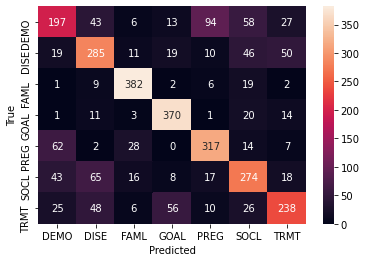

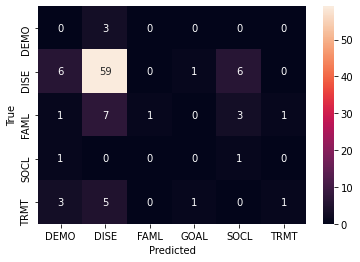

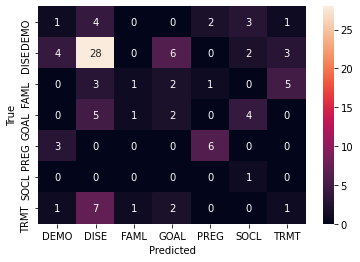

In [49]:
RQ3_utils.make_misclassification_heatmap(test_dataset.labels, test_pred_labels)
RQ3_utils.make_misclassification_heatmap(COVID_annotated_dataset.labels, COVID_annotated_pred_labels)
RQ3_utils.make_misclassification_heatmap(icliniq_annotated_dataset.labels, icliniq_annotated_pred_labels)

## 5.4. Findings <a class="anchor" id="5.4"></a>

### 5.4.1. Illustration <a class="anchor" id="5.4.1"></a>

The image below shows a grouped bar chart comparing the relative frequency of each class in the COVID dataset with that of the icliniq dataset. the cell under it can be used to reproduce the bar chart.

<img src='RQ3/bar.JPG'></td><td>


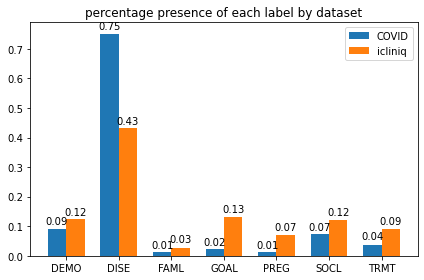

In [50]:
RQ3_utils.make_grouped_bar_chart(COVID_pred_labels, icliniq_pred_labels)

### 5.4.2. Interpretation <a class="anchor" id="5.4.2"></a>

It can be seen in the bar chart that the DISE category is much larger in the COVID dataset compared to the icliniq dataset. All the other categories are less prevalent in the COVID dataset. This result is expected, seeing as the COVID dataset consists of interviews about COVID-19, a disease. The icliniq dataset is not as specific in its contents and therefore has fewer questions about diseases, relatively.

DEMO seems to have shrunk less in the COVID dataset compared to the other classes. This might be because COVID-19 does affect certain demographics more than others, such as people over 65. SOCL also shrank relatively little. This might be because questions about social distancing can be classified as being about socializing.


### 5.4.3. Discussion <a class="anchor" id="5.4.3"></a>

Because the accuracy of the model is not high, these results and interpretations must be taken with a grain of salt. Though, due to the fact that the low score on the annotated datasets may reflect more on the quality of my annotations than that of the model, they should not be done away with entirely. 

With regard to the annotations, they might have been better if there were more people to annotate. This would allow us to obtain more annotations more easily, and might improve quality. However, the main hurdle for annotating is that we do not have access to the original annotation guidelines and trying to infer those guidelines from the dataset is time consuming.


## 5.5. Conclusion <a class="anchor" id="5.5"></a>

### 5.5.1. Summary <a class="anchor" id="5.5.1"></a>

The research question for this section was: What types of questions are asked before and after COVID-19 in medical interviews?

To answer this question, we took questions from online medical interviews and classified them using a PubMedBERT model. The classifier was trained on the ICHI 2016 dataset. The model achieved a 68.76% on the test dataset, which is comparable to scores previously achieved on this dataset. To test whether these results carry over to the questions from the medical interviews, we also tested the model on a dataset of hand-annotated questions from the interviews. On these datasets, the model performed significantly worse. However, it is unclear whether that is because of differences between the ICHI data and the interview questions or due to inaccuracies in annotating.

Using the model predicted classes for the other interview questions. We found that compared to general pre-COVID-19 questions, the questions about COVID-19 were classified as being related to a disease much more often.



### 5.5.2. Lessons Learned <a class="anchor" id="5.5.2"></a>

For this section there are several lessons learned:

* Firstly, Models based on BERT can be used for a wide variety of tasks and achieve results comparable to much more elaborate methods, with very little effort. 
* Second, properly gauging how well a model does on a new dataset can be very difficult, especially if proper instructions for annotation aren't available. 
* Finally, when creating a system of classifications, one must consider whether the boundaries between categories are clear otherwise annotating will be ambiguous and models will perform worse.


### 5.5.3. Directions for future work <a class="anchor" id="5.5.3"></a>

It is clear that, due to several reasons, using the ICHI dataset and its corresponding question taxonomy are not ideal for answering this question. For further research, it would be useful to either annotate much more data from medical interviews so it can be used in finetuning and not just evaluation. Due to having to annotate much more data anyway, further research  also isn't obligated to use the question taxonomy that the ICHI dataset does. Therefore, it might also be worthwhile to design a new question taxonomy with less inherent ambiguity and which is possibly designed to be used in the real world, such as for matching patients and relevant specialists more easily.


# 6. Conclusions <a class="anchor" id="6"></a>
It can be concluded that COVID-19 has changed medical interviews in the following way: first of all, the symptoms and questions became more specific to COVID-19 related topics Instead of discussing general symptoms about multiple diseases, specific COVID-19 related symptoms were discussed. Also, instead of asking general health-related questions about treatment and family support for example, more disease-specific questions were asked. Also the overall sentiment of the medical interviews has become more negative.  
It should be noted that the COVID-19 dialogue dataset focuses specifically on COVID-19 related interviews and topics. For further improvements in this research area, a dataset should be used that is (1) collected during or after the spread of COVID-19, (2) and about the same subject, for example in the lung department. This is needed to make a more general conclusion about the impact of COVID-19 in all health related conversations.

For future research directions it would be interesting to combine the outcomes of the three research questions that have been discussed. For example, a research direction could be to determine if some question types are collocated with some sentiments or symptoms. It can be expected that disease specific questions include more symptoms and maybe more fear or negative sentiment than other types of questions. Another research direction could be to look at the sentiment of each type of question to see if there is a certain sentiment that collocates with a certain type of question. Furthermore, it could be interesting to look at specific dialogues where more symptoms are discussed than in other dialogues. Then, one could look at the sentiments. It is expected that there would be a correlation between more symptoms and more negative sentiment.  

 


# 7. References

__Datasets__ <br>
Chen, S., Ju, Z., Dong, X., Fang, H., Wang, S., Yang, Y., . . .  Xie, P.  (2020).  Meddialog:  alarge-scale medical dialogue dataset.arXiv preprint arXiv:2004.03329.

Zeng, G., Wu, Q., Zhang, Y., Yu, Z., Xing, E. & Xie, P.  (2020).  Develop medical dialoguesystems for covid-19.https://github.com/UCSD-AI4H/COVID-Dialogue

__RQ1__ <br>
Chih-Hsuan  Wei,  Yifan  Peng,  Robert  Leaman,  Al-lan  Peter  Davis,   Carolyn  J.  Mattingly,   Jiao  Li,Thomas   C.   Wiegers,    and   Zhiyong   Lu.   2015.Overview  of  the  BioCreative  V  Chemical  DiseaseRelation (CDR) Task.   InProceedings of the FifthBioCreative Challenge Evaluation Workshop. pages154–166.

Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). Bert: Pre-training of deep 
bidirectional transformers for language understanding. arXiv preprint arXiv:1810.04805.

Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., ... & Stoyanov, V. (2019). Roberta: A robustly optimized bert pretraining approach. arXiv preprint arXiv:1907.11692.

Ushio,  A.  &  Camacho-Collados,  J.   (2021).   T-ner:   An  all-round  python  library  fortransformer-based named entity recognition.  InProceedings of eacl: System de-monstrations.

Vamvas, J. (2019). BERT for NER. Von https://vamvas.ch/bert-for-ner.

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. arXiv preprint arXiv:1706.03762.

__RQ2__

Jelodar, H., Orji, R., Matwin, S., Weerasinghe, S., Oyebode, O., & Wang, Y. (2021). Artificial Intelligence for Emotion-Semantic Trending and People Emotion Detection During COVID-19 Social Isolation. arXiv preprint arXiv:2101.06484.

Mohammad, S. M. (2017). Word affect intensities. arXiv preprint arXiv:1704.08798.

__RQ3__ <br>
Devlin, J., Chang, M., Lee, K., & Toutanova, K.  (2018).  BERT: pre-trainingof  deep  bidirectional  transformers  for  language  understanding.CoRR,abs/1810.04805.  Retrieved fromhttp://arxiv.org/abs/1810.04805

Gu, Y., Tinn, R., Cheng, H., Lucas, M., Usuyama, N., Liu, X., . . .  Poon, H.(2020).Domain-specific  language  model  pretraining  for  biomedical  naturallanguage processing.

Jalan, R., Gupta, M., & Varma, V. (2018). Medical forum question classificationusing deep learning. InEuropean conference on information retrieval(pp. 45–58).

Lewis, P., Ott, M., Du, J., & Stoyanov, V.  (2020).  Pretrained language modelsfor biomedical and clinical tasks:  Understanding and extending the state-of-the-art. InProceedings of the 3rd clinical natural language processing workshop(pp. 146–157).

Li, X., & Roth, D.  (2002).  Learning question classifiers.  InColing  2002:  The19th international conference on computational linguistics.

Loni, B. (2011). A survey of state-of-the-art methods on question classification.

Rasley, J., Rajbhandari, S., Ruwase, O., & He, Y.  (2020).  Deepspeed:  Systemoptimizations enable training deep learning models with over 100 billion pa-rameters.  InProceedings of the 26th acm sigkdd international conference onknowledge discovery & data mining(pp. 3505–3506).

Wolf,  T.,  Debut,  L.,  Sanh,  V.,  Chaumond,  J.,  Delangue,  C.,  Moi,  A.,  . . .Rush,  A.  M.(2020,  October).Transformers:   State-of-the-art  naturallanguage  processing.    InProceedings  of  the  2020  conference  on  empiricalmethods  in  natural  language  processing:   System  demonstrations(pp.  38–45).   Online:   Association  for  Computational  Linguistics.   Retrieved  fromhttps://www.aclweb.org/anthology/2020.emnlp-demos.6